# Cartesian Compressed Sensing (CCS)

In [1]:
%reset -f
%matplotlib inline

import os
import tempfile

import imageio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sigpy as sp
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import utils
from demo_ccs import *

In [2]:
vmin = 0
vmax = 0.015
mpl.rcParams["text.usetex"] = True
mpl.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
mpl.rc("xtick", labelsize=20)
mpl.rc("ytick", labelsize=20)

## Load results.

In [3]:
ref_time = np.load("results/ccs/reference/time.npy")
reference = np.load("results/ccs/reference/iter_%03d.npy" % (ref_time.size - 1))

In [4]:
fista_params = utils.quality_filter("ccs", "fista", eps=None, verbose=True)
eps = np.load("results/ccs/fista_%3.2fx10^%d/err.npy" % fista_params)[1, -1] + 2

Selected best reconstruction parameters.


In [5]:
(fista_params, fista_aha, fista_conv, fista_time) = utils.get_best_case(
    "ccs", "fista", eps=eps
)
fista_iter = [
    np.load(
        "results/ccs/fista_%3.2fx10^%d/iter_%03d.npy" % tuple(list(fista_params) + [k]),
        mmap_mode="r",
    )
    for k in range(fista_conv.size)
]
fista_err = utils.err_helper(fista_iter, reference)

Selected 5 of 15.
CASE: fista_2.60x10^-4 NRMSE: 16.09%
CASE: fista_1.73x10^-4 NRMSE: 14.84%
CASE: fista_1.15x10^-4 NRMSE: 14.41%
CASE: fista_7.70x10^-5 NRMSE: 14.66%
CASE: fista_5.13x10^-5 NRMSE: 15.38%


In [6]:
(ifista_params, ifista_aha, ifista_conv, ifista_time) = utils.get_best_case(
    "ccs", "ifista", eps=eps
)
ifista_iter = [
    np.load(
        "results/ccs/ifista_%3.2fx10^%d_%d/iter_%03d.npy"
        % tuple(list(ifista_params) + [k])
    )
    for k in range(ifista_conv.size)
]
ifista_err = utils.err_helper(ifista_iter, reference)

Selected 24 of 75.
CASE: ifista_8.77x10^-4_5 NRMSE: 16.02%
CASE: ifista_8.77x10^-4_6 NRMSE: 15.59%
CASE: ifista_5.85x10^-4_3 NRMSE: 15.72%
CASE: ifista_5.85x10^-4_4 NRMSE: 15.03%
CASE: ifista_5.85x10^-4_5 NRMSE: 14.69%
CASE: ifista_5.85x10^-4_6 NRMSE: 14.50%
CASE: ifista_3.90x10^-4_2 NRMSE: 15.39%
CASE: ifista_3.90x10^-4_3 NRMSE: 14.60%
CASE: ifista_3.90x10^-4_4 NRMSE: 14.39%
CASE: ifista_3.90x10^-4_5 NRMSE: 14.38%
CASE: ifista_3.90x10^-4_6 NRMSE: 14.44%
CASE: ifista_2.60x10^-4_2 NRMSE: 14.51%
CASE: ifista_2.60x10^-4_3 NRMSE: 14.41%
CASE: ifista_2.60x10^-4_4 NRMSE: 14.62%
CASE: ifista_2.60x10^-4_5 NRMSE: 14.86%
CASE: ifista_2.60x10^-4_6 NRMSE: 15.08%
CASE: ifista_1.73x10^-4_2 NRMSE: 14.45%
CASE: ifista_1.73x10^-4_3 NRMSE: 14.93%
CASE: ifista_1.73x10^-4_4 NRMSE: 15.40%
CASE: ifista_1.73x10^-4_5 NRMSE: 15.80%
CASE: ifista_1.73x10^-4_6 NRMSE: 16.13%
CASE: ifista_1.15x10^-4_2 NRMSE: 15.04%
CASE: ifista_1.15x10^-4_3 NRMSE: 15.89%
CASE: ifista_7.70x10^-5_2 NRMSE: 16.04%


In [7]:
(admm_params, admm_aha, admm_conv, admm_time) = utils.get_best_case(
    "ccs", "admm", eps=eps
)
admm_iter = [
    np.load(
        "results/ccs/admm_%3.2fx10^%d_%d/iter_%03d.npy" % tuple(list(admm_params) + [k])
    )
    for k in range(admm_conv.size)
]
admm_err = utils.err_helper(admm_iter, reference)

Selected 17 of 75.
CASE: admm_8.10x10^1_5 NRMSE: 15.78%
CASE: admm_8.10x10^1_6 NRMSE: 15.20%
CASE: admm_2.70x10^1_4 NRMSE: 15.70%
CASE: admm_2.70x10^1_5 NRMSE: 15.24%
CASE: admm_2.70x10^1_6 NRMSE: 14.88%
CASE: admm_9.00x10^0_2 NRMSE: 16.29%
CASE: admm_9.00x10^0_3 NRMSE: 15.08%
CASE: admm_9.00x10^0_4 NRMSE: 14.66%
CASE: admm_9.00x10^0_5 NRMSE: 14.49%
CASE: admm_9.00x10^0_6 NRMSE: 14.40%
CASE: admm_3.00x10^0_2 NRMSE: 14.66%
CASE: admm_3.00x10^0_3 NRMSE: 14.52%
CASE: admm_3.00x10^0_4 NRMSE: 14.45%
CASE: admm_3.00x10^0_5 NRMSE: 14.59%
CASE: admm_3.00x10^0_6 NRMSE: 14.83%
CASE: admm_1.00x10^0_2 NRMSE: 15.04%
CASE: admm_1.00x10^0_3 NRMSE: 15.81%


In [8]:
(pfista_params, pfista_aha, pfista_conv, pfista_time) = utils.get_best_case(
    "ccs", "pfista", eps=eps
)
pfista_iter = [
    np.load(
        "results/ccs/pfista_%3.2fx10^%d_%d/iter_%03d.npy"
        % tuple(list(pfista_params) + [k])
    )
    for k in range(pfista_conv.size)
]
pfista_err = utils.err_helper(pfista_iter, reference)

Selected 20 of 75.
CASE: pfista_1.31x10^-3_3 NRMSE: 16.23%
CASE: pfista_1.31x10^-3_4 NRMSE: 15.49%
CASE: pfista_1.31x10^-3_5 NRMSE: 15.32%
CASE: pfista_1.31x10^-3_6 NRMSE: 15.35%
CASE: pfista_8.77x10^-4_2 NRMSE: 16.11%
CASE: pfista_8.77x10^-4_3 NRMSE: 14.77%
CASE: pfista_8.77x10^-4_4 NRMSE: 14.49%
CASE: pfista_8.77x10^-4_5 NRMSE: 14.61%
CASE: pfista_8.77x10^-4_6 NRMSE: 14.91%
CASE: pfista_5.85x10^-4_2 NRMSE: 14.79%
CASE: pfista_5.85x10^-4_3 NRMSE: 14.36%
CASE: pfista_5.85x10^-4_4 NRMSE: 14.70%
CASE: pfista_5.85x10^-4_5 NRMSE: 15.27%
CASE: pfista_5.85x10^-4_6 NRMSE: 16.05%
CASE: pfista_3.90x10^-4_2 NRMSE: 14.37%
CASE: pfista_3.90x10^-4_3 NRMSE: 14.85%
CASE: pfista_3.90x10^-4_4 NRMSE: 15.79%
CASE: pfista_2.60x10^-4_2 NRMSE: 14.72%
CASE: pfista_2.60x10^-4_3 NRMSE: 15.96%
CASE: pfista_1.73x10^-4_2 NRMSE: 15.60%


## Plots.

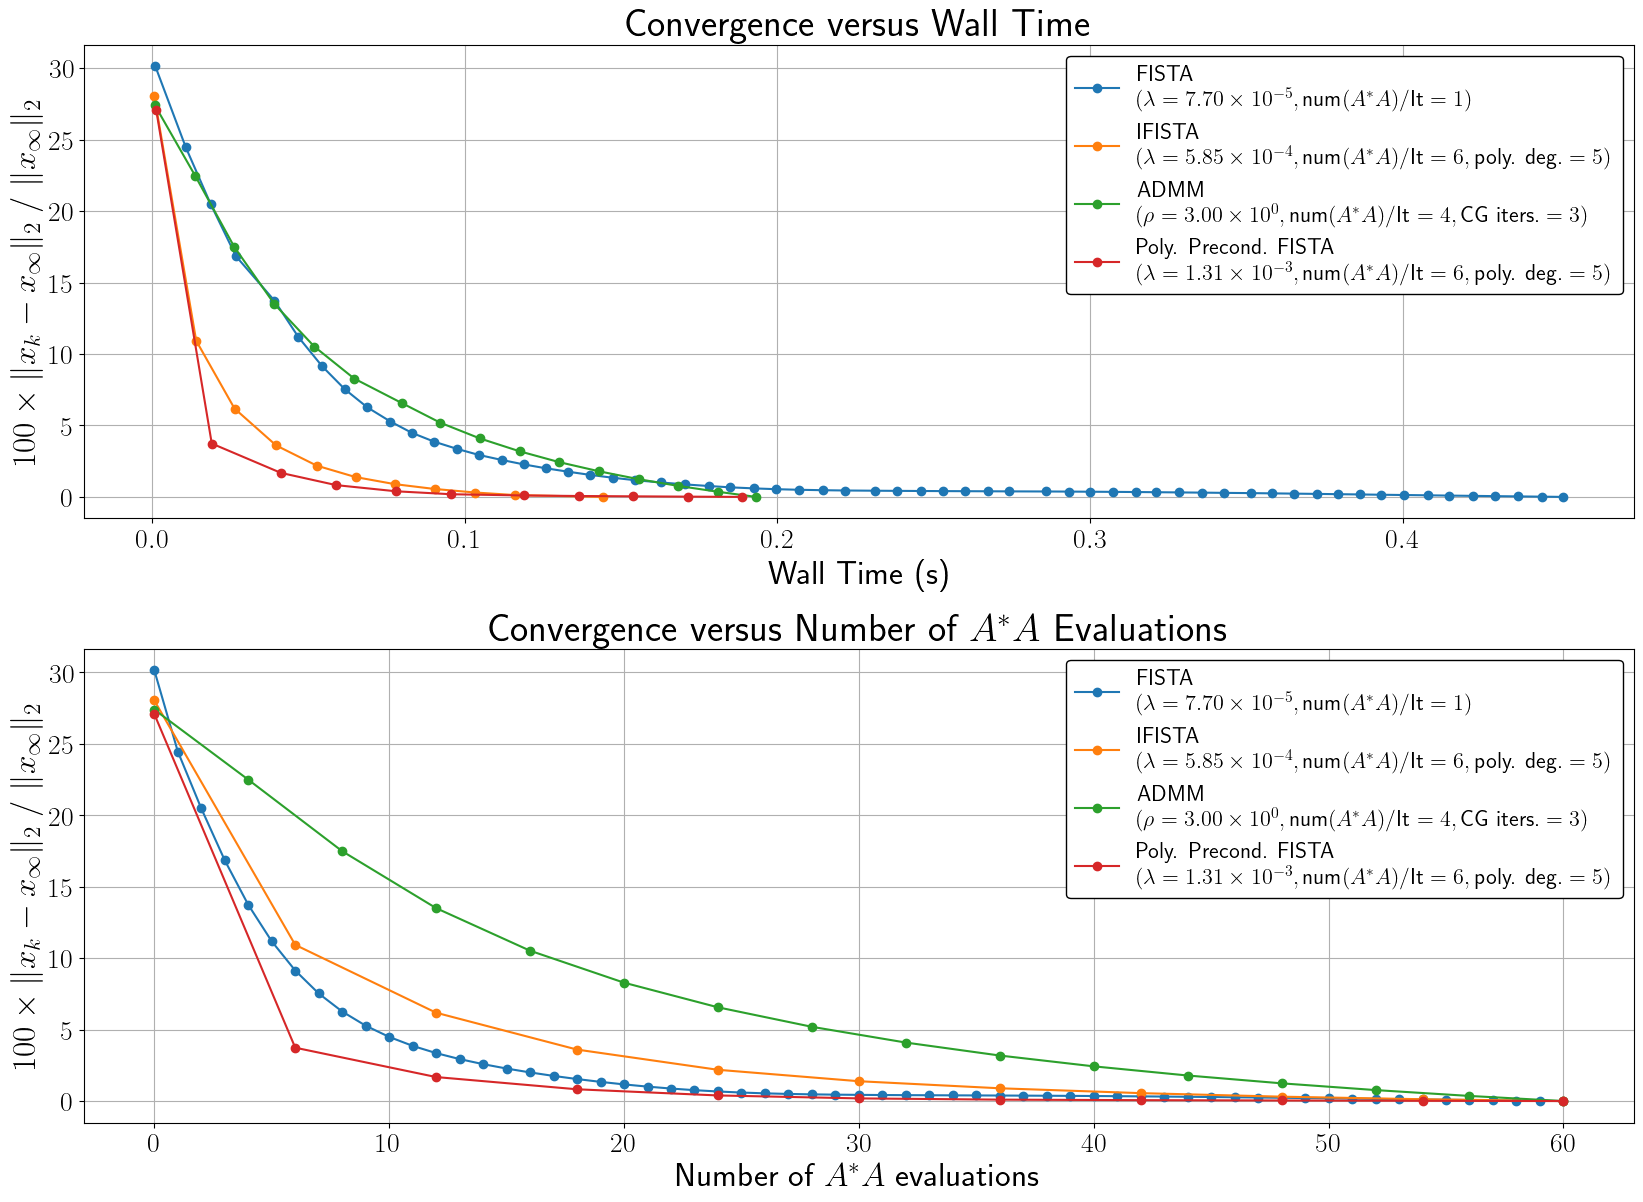

In [9]:
legend = [
    "FISTA\n$(\lambda=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=1)$"
    % fista_params,
    "IFISTA\n$(\lambda=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=%d, \\text{poly. deg.}=%d)$"
    % (ifista_params + (ifista_params[-1] - 1,)),
    "ADMM\n$(\\rho=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=%d, \\text{CG iters.}=%d)$"
    % (admm_params + (admm_params[-1] - 1,)),
    "Poly. Precond. FISTA\n$(\lambda=%3.2f\\times10^{%d}, \\text{num}(A^*A)/\\text{It}=%d, \\text{poly. deg.}=%d)$"
    % (pfista_params + (pfista_params[-1] - 1,)),
]

(fig, axs) = plt.subplots(2, 1, figsize=(20, 14), dpi=100)

axs[0].plot(fista_time, fista_conv, marker="o")
axs[0].plot(ifista_time, ifista_conv, marker="o")
axs[0].plot(admm_time, admm_conv, marker="o")
axs[0].plot(pfista_time, pfista_conv, marker="o")
axs[0].set_xlabel("Wall Time (s)", fontsize=24)
axs[0].set_title("Convergence versus Wall Time", fontsize=28)

axs[1].plot(fista_aha, fista_conv, marker="o")
axs[1].plot(ifista_aha, ifista_conv, marker="o")
axs[1].plot(admm_aha, admm_conv, marker="o")
axs[1].plot(pfista_aha, pfista_conv, marker="o")
axs[1].set_xlabel("Number of $A^*A$ evaluations", fontsize=24)
axs[1].set_title("Convergence versus Number of $A^*A$ Evaluations", fontsize=28)

for ax in axs.ravel():
    ax.set_ylabel(
        "$100 \\times \lVert x_k - x_\infty \\rVert_2 \;/\; \lVert x_\infty \\rVert_2$",
        fontsize=24,
    )
    ax.legend(
        legend, ncol=1, fontsize=16, loc="upper right", framealpha=1, edgecolor="black"
    )
    ax.grid()

plt.subplots_adjust(hspace=0.275);

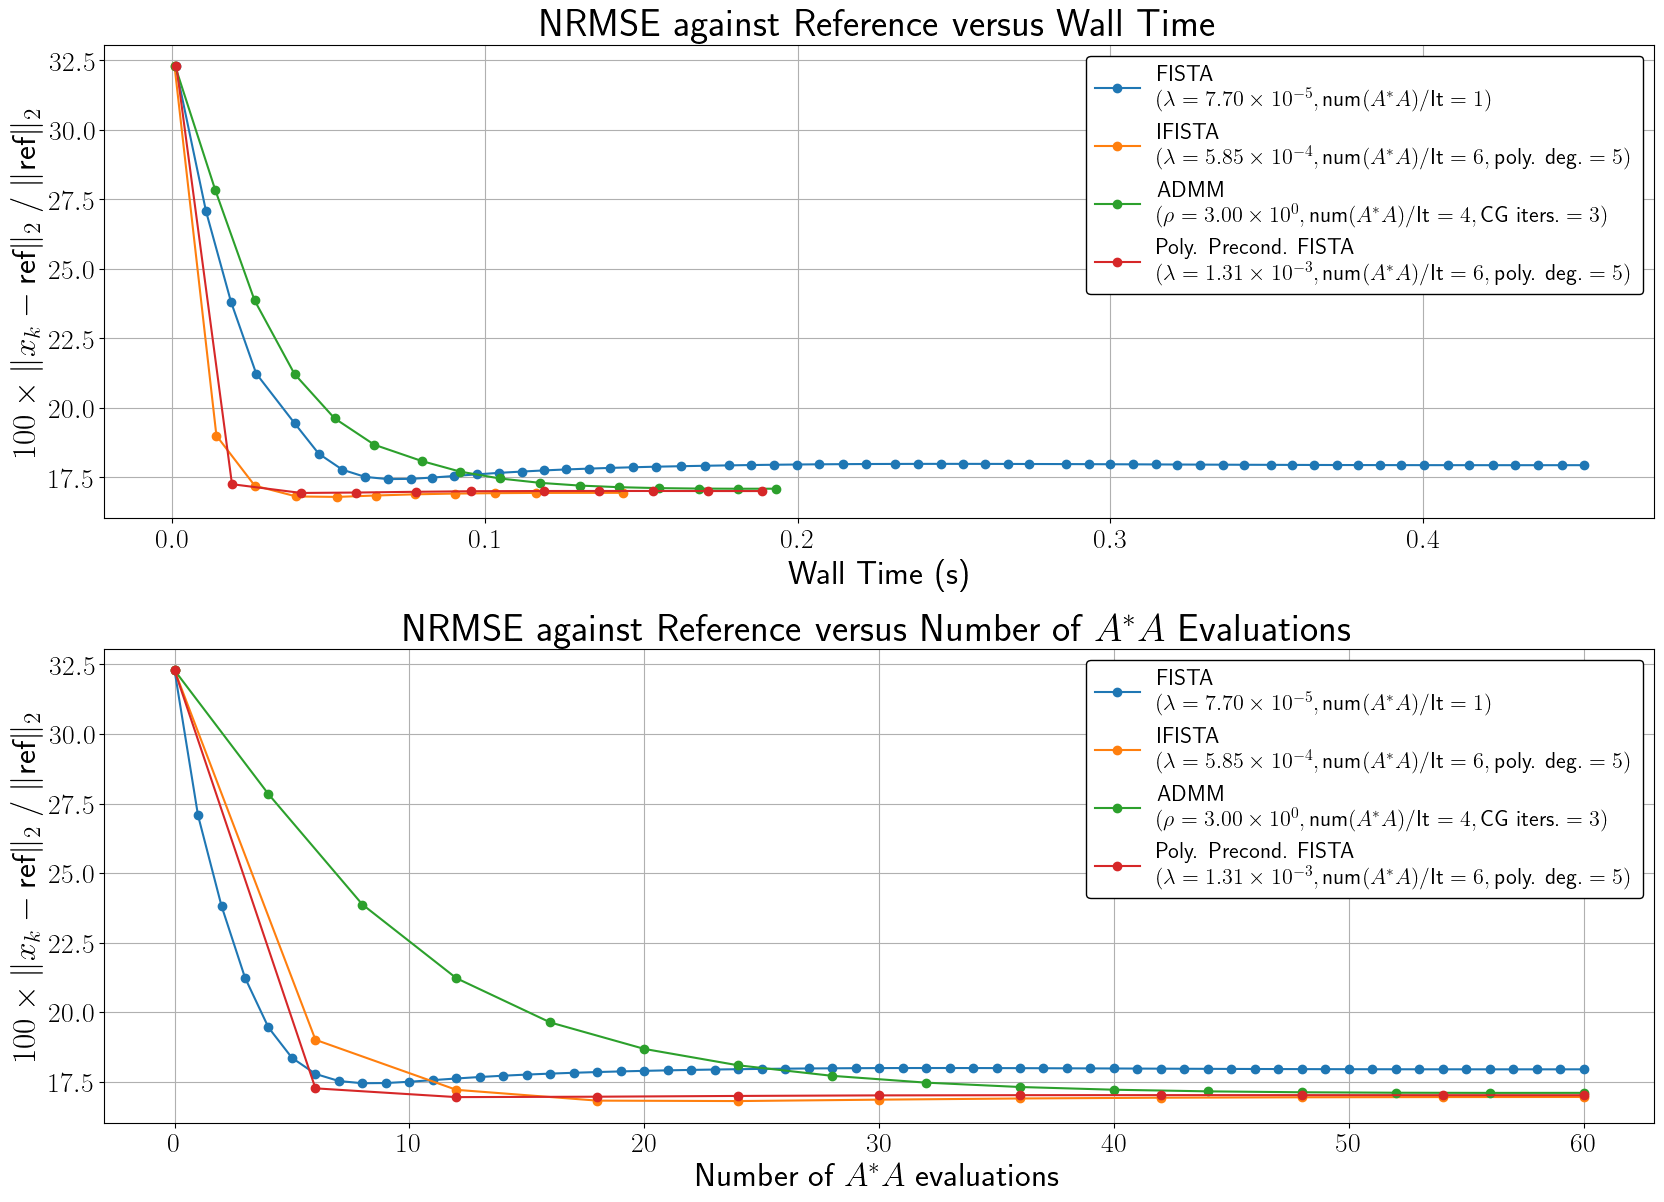

In [10]:
(fig, axs) = plt.subplots(2, 1, figsize=(20, 14), dpi=100)

axs[0].plot(fista_time, fista_err, marker="o")
axs[0].plot(ifista_time, ifista_err, marker="o")
axs[0].plot(admm_time, admm_err, marker="o")
axs[0].plot(pfista_time, pfista_err, marker="o")
axs[0].set_xlabel("Wall Time (s)", fontsize=24)
axs[0].set_title("NRMSE against Reference versus Wall Time", fontsize=28)

axs[1].plot(fista_aha, fista_err, marker="o")
axs[1].plot(ifista_aha, ifista_err, marker="o")
axs[1].plot(admm_aha, admm_err, marker="o")
axs[1].plot(pfista_aha, pfista_err, marker="o")
axs[1].set_xlabel("Number of $A^*A$ evaluations", fontsize=24)
axs[1].set_title(
    "NRMSE against Reference versus Number of $A^*A$ Evaluations", fontsize=28
)

for ax in axs.ravel():
    ax.set_ylabel(
        "$100 \\times \lVert x_k - \\text{ref} \\rVert_2 \;/\; \lVert \\text{ref} \\rVert_2$",
        fontsize=24,
    )
    ax.legend(
        legend, ncol=1, fontsize=16, loc="upper right", framealpha=1, edgecolor="black"
    )
    ax.grid()

plt.subplots_adjust(hspace=0.275);

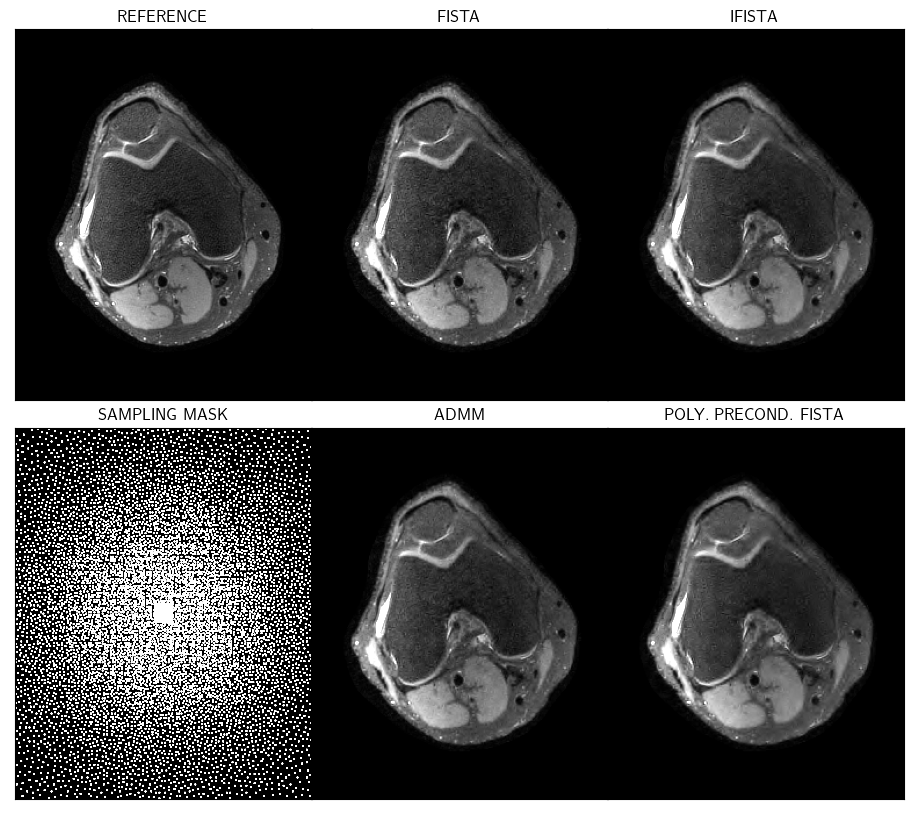

In [11]:
(fig, axs) = plt.subplots(2, 3, figsize=(12, 10), dpi=100)

f = lambda x: x.T / np.linalg.norm(x)
msk = np.load("data/cartesian_knee/msk.npy")

axs[0][0].imshow(np.abs(f(reference)), cmap="gray", vmin=0, vmax=vmax)
axs[0][1].imshow(np.abs(f(fista_iter[-1])), cmap="gray", vmin=0, vmax=vmax)
axs[0][2].imshow(np.abs(f(ifista_iter[-1])), cmap="gray", vmin=0, vmax=vmax)
axs[1][0].imshow(np.abs(msk.T), cmap="gray", vmin=0, vmax=vmax)
axs[1][1].imshow(np.abs(f(admm_iter[-1])), cmap="gray", vmin=0, vmax=vmax)
axs[1][2].imshow(np.abs(f(pfista_iter[-1])), cmap="gray", vmin=0, vmax=vmax)

axs[0][0].set_title("REFERENCE")
axs[0][1].set_title("FISTA")
axs[0][2].set_title("IFISTA")
axs[1][0].set_title("SAMPLING MASK")
axs[1][1].set_title("ADMM")
axs[1][2].set_title("POLY. PRECOND. FISTA")

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=-0.125, hspace=0.075)

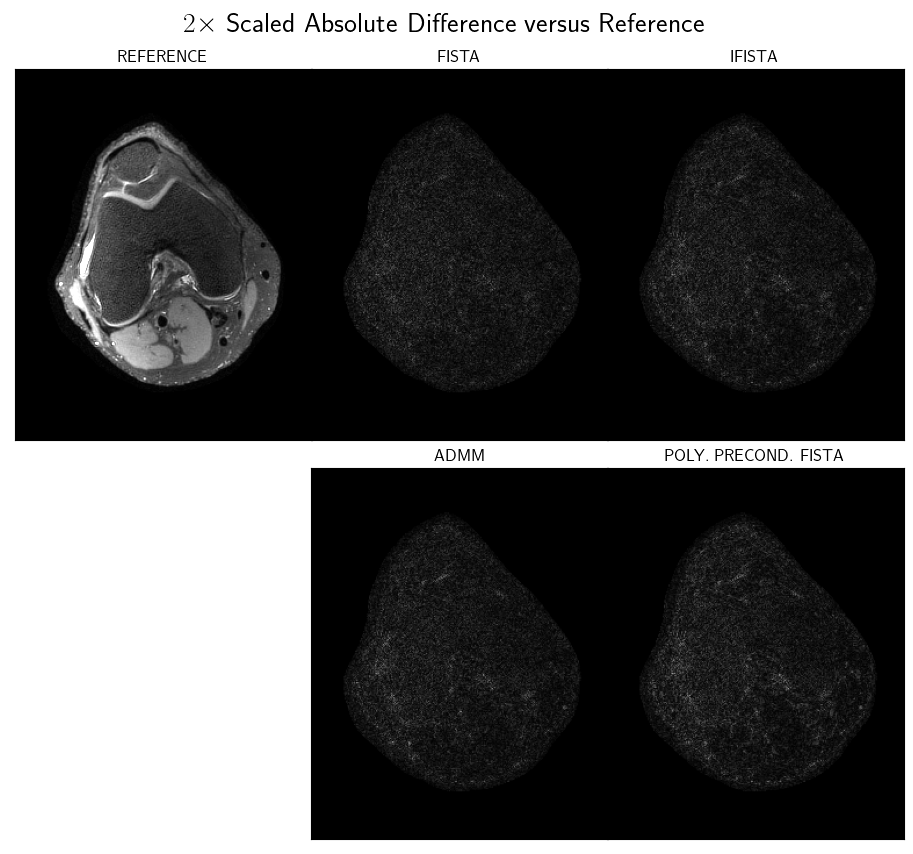

In [12]:
(fig, axs) = plt.subplots(2, 3, figsize=(12, 10), dpi=100)

f = lambda x: x.T / np.linalg.norm(x)

axs[0][0].imshow(np.abs(f(reference)), cmap="gray", vmin=0, vmax=vmax)
axs[0][1].imshow(
    np.abs(f(fista_iter[-1]) - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax
)
axs[0][2].imshow(
    np.abs(f(ifista_iter[-1]) - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax
)

axs[1][1].imshow(
    np.abs(f(admm_iter[-1]) - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax
)
axs[1][2].imshow(
    np.abs(f(pfista_iter[-1]) - f(reference)) * 2, cmap="gray", vmin=0, vmax=vmax
)

axs[0][0].set_title("REFERENCE")
axs[0][1].set_title("FISTA")
axs[0][2].set_title("IFISTA")

axs[1][1].set_title("ADMM")
axs[1][2].set_title("POLY. PRECOND. FISTA")

axs[1][0].remove()

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=-0.125, hspace=0.075)
plt.suptitle(
    r"$2 \times$ Scaled Absolute Difference versus Reference", fontsize=20, y=0.94
);

## Video.

In [13]:
with tempfile.TemporaryDirectory() as dirpath:
    for k in range(0, len(pfista_iter)):

        num_aha = k * pfista_params[-1]
        x = f(fista_iter[num_aha])
        y = f(pfista_iter[k])

        (fig, axs) = plt.subplots(1, 2, figsize=(10, 5), dpi=128)
        axs[0].imshow(np.abs(x), vmin=0, vmax=vmax, cmap="gray")
        axs[1].imshow(np.abs(y), vmin=0, vmax=vmax, cmap="gray")

        for ax in axs.ravel():
            ax.set_xticks([])
            ax.set_yticks([])

        plt.subplots_adjust(wspace=-0.3)
        axs[0].set_xlabel("FISTA", fontsize=24)
        axs[1].set_xlabel("Poly. Precond. FISTA", fontsize=24)
        plt.suptitle("num. $A^*A$: %d" % (num_aha), fontsize=24, x=0.5155)
        plt.savefig(os.path.join(dirpath, "frame_%03d.png" % (k + 1)))
        plt.close()

    writer = imageio.get_writer("videos/ccs.gif", fps=2)
    for k in range(0, len(pfista_iter)):
        im = imageio.v2.imread(os.path.join(dirpath, "frame_%03d.png" % (k + 1)))
        writer.append_data(im)
    writer.close()

## End of notebook.